<a href="https://colab.research.google.com/github/Mystorius/project_terror/blob/final_code/word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install wordcloud
!pip install nltk

In [0]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import nltk


from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [0]:
file = 'data_word_cloud.csv'
df = pd.read_csv(file, sep=";", header=0, encoding="ISO-8859-1", low_memory=False)

specific
motive
;
however
,
observers
believe
attack
targeting
western
foreigners
part
campaign
islamic
extremists
destabilize
algeria
killing
civilians
random
.
yemeni
tribesmen
wanted
mar
yemen
's
reputation
harm
relations
friendly
states
group
demanded
release
leader
salih
haydara
al-atwi
end
sanctions
iraq
obtain
money
ransom
demands
al-shamlan
tribe
schools
development
projects
exchange
safe
hostages
although
thought
sources
ongoing
target
tourists
area
well
possible
response
arrest
top
eta
also
note
shortly
bombing
spanish
official
publicly
declared
would
terrorism
sinn
fein
recently
confirmed
rejected
british
government
proposals
reform
province
police
force
key
issue
disagreement
holding
peace
talks
suspected
marando
hotel
targeted
due
likelihood
able
pay
high
ransoms
protest
presence
europeans
specifically
perpetrators
hoping
gain
four
algerian
held
german
authorities
accused
planning
blow
market
france
retaliation
recent
crackdown
militants
officials
said
attacks
intended
hur

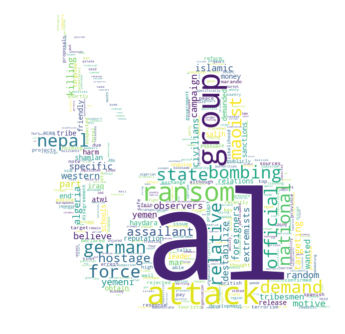

In [0]:
df_group = df.loc[(df['gname'] == 'Taliban') | (df['gname'] == 'Islamic State of Iraq and the Levant (ISIL)') | (df['gname'] == 'Boko Haram')]
#mask = np.array(Image.open("ak_47.jpg"))
mask =np.array(Image.open("terrorist.png"))

df['motive'] = np.where(df['motive'] == 'The specific motive for the attack is unknown.', '', df['motive'])
motive = df.loc[(df['targtype1_txt'] == 'Tourists'), 'motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(motive)
stopwords = nltk.corpus.stopwords.words('english')
[stopwords.append(w_) for w_ in ['unknown']]
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)
for i in words_except_stop_dist:
  print(i)
wordcloud = WordCloud(max_font_size=250, max_words=1000, stopwords=STOPWORDS, background_color='white', width=500,
                  height=500, margin=0, mask=mask).generate(" ".join(words_except_stop_dist))


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
wordcloud.to_file("cloud_test2.png")